# Data Science Primer

In [2]:
import pandas as pd

dataset = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

# Chapter 1 - Bird's Eye View
**Machine Learning is not about algorithms, it's a comprehensive approach to solving problems.**  

Machine Learning is the practive of **teaching** computers how to learn patterns from data, often making **decisions or predictions**.  

## Key Terminology
**Model :** A set of patterns learned from data  
**Algorithm :** A spectific Machine Learning process used to train a model  
**Training data :** The dataset from which the *algorithm learns the model*  
**Test data :** A new dataset for reliably evaluating model performance  
**Features :** Variables (or columns) in a dataset used to train the model  
**Observations :** Data points (or rows) in the dataset  
**Target variables :** A specific variable you're trying to predict  

## Machine Learning Tasks
- A **task** is a specific objective for your algorithms
- Algorithms can be swapped in and out, as long as you pick the right task
- **Always try multiple algorithms**

### Supervised Learning
Includes tasks for **labeled** data (with a *target variable*)  
- Often used as an advanced form of predictive modeling  
- Each observation must be **labeled** with a *correct answer*  
- Build a predictive model, and tell it what's *correct* while training it  

#### Regression
Task for modeling **continuous** target variables
#### Classification 
Task for modeling **categorical** target variables

### Unsupervised Learning
Includes tasks for **unlabeled** data (without *target variable*)  
- Often used either as a form of *automated data analysis* or *automated signal extraction*  
- **Unlabeled** data has no **predetermined** *correct answer*  
- The algorithm directly learn patterns from the data

#### Clustering
Finding groups within your data

# Chapter 2 - Exploratory Analysis
**Get to know the dataset**  
- Gain valuable hints for *Data Cleaning*  
- Think of ideas for *Feature Engineering*  
- Get the *feel* for the dataset, helping you communicate results and deliver greater impact  

## Start with Basics
Answer a set of basic questions about the dataset
- How many observations do I have ?  
- How many features ?  
- What are the data types of my features ? (Numeric or Categorical)  
- Do I have target variable ?  

### Example observations
**Display example observations** from the dataset to get the *feel* for the values of each feature.

In [6]:
dataset.sample(n=5)

,sepal.length,sepal.width,petal.length,petal.width,variety
27,5.2,3.5,1.5,0.2,Setosa
20,5.4,3.4,1.7,0.2,Setosa
105,7.6,3.0,6.6,2.1,Virginica
112,6.8,3.0,5.5,2.1,Virginica
56,6.3,3.3,4.7,1.6,Versicolor


Get a **Qualitative** ***feel*** for the dataset
- Do the columns make sense ?  
- Do the values in those columns make sense ?  
- Are the values on the right scale ?  
- Is **Missing data** going to be a big problem ?  

## Plot Numerical Distributions
Often, an **histogram** is enough to understand the distributions  

Here are a few things to look out for :  
- Distributions that are unexpected  
- Potential outliers that don't make sense  
- Features that should be binary  
- Boundaries that don't make sense  
- Potential measurement errors  

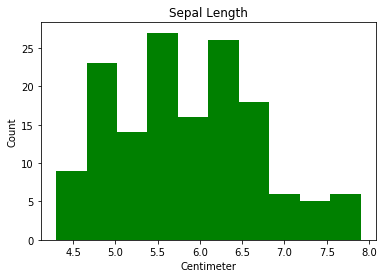

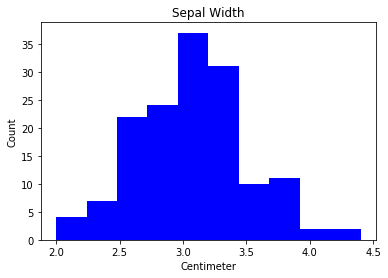

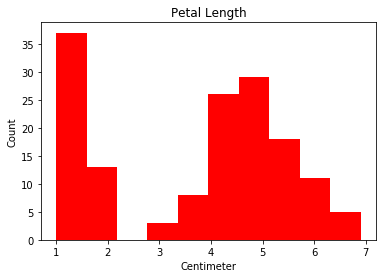

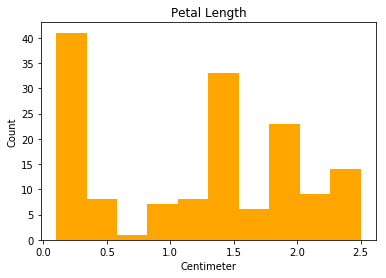

In [19]:
import matplotlib.pyplot as plt

plt.hist(dataset.iloc[:, 0], color="green")
plt.title("Sepal Length")
plt.xlabel("Centimeter")
plt.ylabel("Count")

plt.show()

plt.hist(dataset.iloc[:, 1], color="blue")
plt.title("Sepal Width")
plt.xlabel("Centimeter")
plt.ylabel("Count")

plt.show()

plt.hist(dataset.iloc[:, 2], color="red")
plt.title("Petal Length")
plt.xlabel("Centimeter")
plt.ylabel("Count")

plt.show()

plt.hist(dataset.iloc[:, 3], color="orange")
plt.title("Petal Length")
plt.xlabel("Centimeter")
plt.ylabel("Count")

plt.show()

## Plot Categorical Distributions
We can use **Bar plots** to visualize categorical features.  
Look out for **Sparse classes**, which are classes that have a very small number of observations.


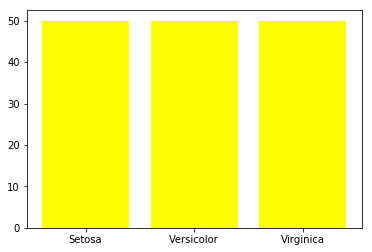

In [36]:
plt.bar(dataset.iloc[:, 4], color="yellow", height = 50)
plt.show()

## Plot Segmentations
Powerful ways to observe the **relationship** between **categorical features** and **numeric features**
### Box Plots

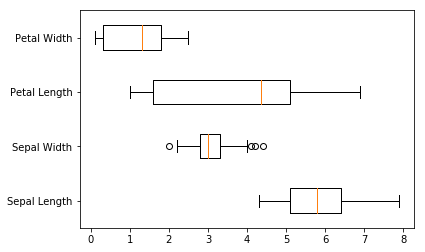

In [53]:
data = [dataset.iloc[:, 0], dataset.iloc[:, 1], dataset.iloc[:, 2], dataset.iloc[:, 3]]
plt.boxplot(data, vert=False)
plt.yticks([1, 2, 3, 4], ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

## Study Correlations
Study the **relationships** between **numeric features** and **other numeric features**  

**Correlation** is a value between -1 and 1 that represents how closely two features move in unison.  
- **Positive** correlation : When one feature increases, the other one increases too  
- **Negative** correlation : When one feature increses, the other one decreases  
- Correlations near -1 or 1 indicated a strong relationship  
- Those closer to 0 indicate a weak relationship  

In general, we should look out for :  
- Wich features are strongly correlated with the target variable
- Are the **interesting or unexpected** strong correlations between other features

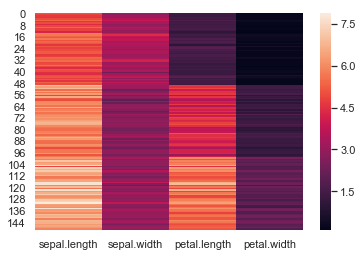

In [65]:
import seaborn as sns
sns.set()

sns.heatmap(dataset.iloc[:, 0:4])

# Chapter 3 - Data Cleaning
**Garbage in, Garbage out**  
## Remove Unwanted Observations
### Duplicate Obervations
Frequently arise during data collection :  
- Combine datasets from multiple places  
- Scrape data  
- Receive data from clients or other departments  

### Irrelevant Observations
Don't fit the **specific problem**

## Fix Structural Errors
**Structural errors** are errors involving **typos**, **inconsistent capitalization**, ...

## Filter Unwanted Outliers
**Outliers** can cause problems with certain type of models (ex : Linear Regression models are less robust to outliers).

You need a **legitimate reason** to remove an outlier.

## Handle Missing Data
#### Dropping
Remove observations that have missing values.  
When you drop observations, you **drop information**.

#### Imputing
Replace missing values with substituted values based on other observations.  
Value was originally missing but you filled it in, which always leads to a **loss in information**.

### Missing categorical data
**Label** missing data with the value 'Missing'.  
- You’re essentially adding a new class for the feature.  
- Tells the algorithm that the value was missing.  
- Gets around the technical requirement for no missing values.  

### Missing numeric data
**Flag and fill** the values  
1) Flag the observation with an indicator variable of missingness.  
2) Fill the original missing value with 0 just to meet the technical requirement of no missing values.  
Allows the algorithm to **estimate the optimal constant for missingness**, instead of just filling it in with the mean.

# Chapter 4 - Feature Engineering
**Creating new input features** from your existing ones.
- Isolate and highlight key information
- Bring other people and your own **domain expertise**

## Infuse Domain Knowledge
You can often engineer informative features by tapping into your (or others) expertise about the domain.

## Create Interaction Features
Create any **interaction features** that make sense. These are combinations of two or more features.  
**Interaction features** can be **products, sums** or **differences** between two features.  

- Could I combine this information in any way that might be even more useful?

## Combine Sparse Classes
Group **similar classes**.  
After combining sparse classes, we have fewer unique classes, but each one has more observations.  

Often, an eyeball test is enough to decide if you want to group certain classes together.  

## Add Dummy Variables
Most machine learning algorithms cannot directly handle categorical features. Specifically, they cannot handle text values.  

**Dummy Variables** are a set of binary variables that each represent a single class from a categorical feature.  

Pass the technical requirements for algorithms.  

## Remove Unused Features
**Unused features** are those that don’t make sense to pass into our machine learning algorithms.  
Examples include:
- ID columns  
- Features that wouldn't be available at the time of prediction  
- Other text descriptions  

**Redundant features** would typically be those that have been replaced by other features that you’ve added during feature engineering.

# Chapter 5 - Algorithm Selection
## Why Linear Regression is Flawed 
![linear_regression](https://elitedatascience.com/wp-content/uploads/2017/02/noisy-sine-linear-regression.png)
Simple linear regression models fit a *straight line* (technically a **hyperplane** depending on the number of features).  
In practice, they **rarely perform well**.  

Simple linear regression suffers from two major flaws:  
1) It's prone to overfit with many input features.  
2) It cannot easily express non-linear relationships.

## Regularization in Machine Learning
Regularization is a technique used to **prevent overfitting** by *artificially penalizing model coefficients*.  
- It can discourage large coefficients (by dampening them).  
- It can also remove features entirely (by setting their coefficients to 0).  
- The *strength* of the penalty is tunable.  

### Lasso Regression
**L**east **A**bsolute **S**hrinkage and **S**election **O**perator.  
- Penalizes the absolute size of coefficients.  
- Leads to coefficients that can be exactly 0.  
- Offers automatic feature selection because it can completely remove some features.  
- The *strength* of the penalty should be tuned.  
- A stronger penalty leads to more coefficients pushed to zero.  

### Ridge Regression
- Penalizes the squared size of coefficients.  
- Leads to smaller coefficients, but it doesn't force them to 0.  
- Ridge offers feature shrinkage.  
- The *strength* of the penalty should be tuned.  
- A stronger penalty leads to coefficients pushed closer to zero.  

### Elastic-Net
Elastic-Net is a compromise between Lasso and Ridge.  
- Penalizes a mix of both absolute and squared size.  
- The ratio of the two penalty types should be tuned.  
- The overall strength should also be tuned.  

## Decision Tree Algos
Decision trees model data as a *tree* of hierarchical branches. They make branches until they reach *leaves* that represent predictions.  
Due to their branching structure, decision trees can easily **model nonlinear relationships**.  

Individual unconstrained decision trees are very **prone to being overfit**.

## Tree Ensembles
Ensembles are machine learning methods for **combining predictions from multiple separate models**.  

### Bagging
**Reduce the chance overfitting** complex models.  

- It trains a large number of *strong* learners in parallel.  
- A strong learner is a model that's relatively **unconstrained**.  
- Bagging then combines all the strong learners together in order to *smooth out* their predictions.

### Boosting
**Improve the predictive flexibility** of simple models.  

- It trains a large number of *weak* learners in sequence.  
- A weak learner is a constrained model.  
- Each one in the sequence focuses on **learning from the mistakes** of the one before it.  
- Boosting then combines all the weak learners into a single strong learner.  

### Random forests
Random forests **train a large number of** ***strong*** **decision trees** and **combine their predictions** through bagging.  

1) Each tree is only allowed to choose from a random subset of features to split on (leading to **feature selection**).  
2) Each tree is only trained on a random subset of observations (**resampling**).  

### Boosted trees
Boosted trees **train a large number of** ***weak*** **decision trees** and **combine their predictions** through boosting.  
- Each tree is allowed a maximum depth, which should be tuned.  
- Each tree in the sequence tries to correct the prediction errors of the one before it.  

# Chapter 6 - Model Training
## Split dataset
**Training sets** are used to fit and tune your models.  
**Test sets** are put aside as *unseen data* to evaluate your models.  

If the model performs very well on the training data but poorly on the test data, then it’s **overfit**.  

## Hyperparameters
### Model parameters
Model parameters are learned attributes that **define individual models**.  
- They can be **learned directly** from the training data  

Example :
- Regression coefficients
- Decision Tree split locations

### Hyperparameters
Hyperparameters express ***higher-level*** **structural settings** for algorithms.  
- They are **decided before fitting** the model because they **can't be learned from the data**.  

Example :
- Strength of the penalty used in regularized forest  
- The number of trees to include in a random forest  

## Cross-Validation
Cross-validation is a method for **getting a reliable estimate** of model performance using only your training data.  
### 10-Fold cross-validation
Breaks your training data into 10 equal parts (or folds), essentially creating 10 miniature train/test splits.  

1) Split your data into 10 equal parts.  
2) Train your model on 9 folds.  
3) Evaluate it on the 1 remaining "hold-out" fold.  
4) Perform steps (2) and (3) 10 times, each time holding out a different fold.  
5) Average the performance across all 10 hold-out folds.  

The average performance across the 10 hold-out folds is your **final performance estimate**. (also called your **cross-validated score**)  

## Fit and Tune Models
Perform the **entire cross-validation loop** detailed above on **each set of hyperparameter values**.

We'll have a cross-validated score for each set of hyperparameter values, for each algorithm.  

We'll **pick the best set** of hyperparameters within each algorithm.  

## Select Winning Model
**Evaluate** each model and **pick** the best one.  

Use **test set** to **estimate** each models performance.  

**Performance metrics** :
- For regression tasks, we recommend **Mean Squared Error (MSE)** or **Mean Absolute Error (MAE)**.  
- For classification tasks, we recommend **Area Under ROC Curve (AUROC)**.  

Use these questions to **help you pick** the winning model :  
- Which model had the best performance on the test set? (**performance**)  
- Does it perform well across various performance metrics? (**robustness**)  
- Did it also have (one of) the best cross-validated scores from the training set? (**consistency**)  
- Does it solve the original business problem? (**win condition**)  